In [23]:
import os
import joblib
import pickle
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from mlcog.utils import plotting
from mlcog import shap

In [2]:
feature_abbr = 'cv_ling'  
model_abbr = 'rf'
filename = f"10fcv_{model_abbr}.pkl"
file_path = os.path.join("../data/cv_eval/", feature_abbr, filename)
if os.path.exists(file_path):
    best_model = joblib.load(file_path)
best_model

,n_estimators,100
,criterion,'gini'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [4]:
# changes conversation to Linguistic Disfluency
ling_feature_names = ['WordCount','Analytic','Clout','Authentic','Tone','WordsPerSentence',\
    'BigWords','Dic','Linguistic','function','pronoun','ppron','i','we','you','shehe','they','ipron',\
    'det','article','number','prep','auxverb','adverb','conj','negate','verb','adj',\
    'quantity','Drives','affiliation','achieve','power','Cognition','allnone','cogproc','insight',\
    'cause','discrep','tentat','certitude','differ','memory','Affect','tone_pos','tone_neg',\
    'emotion','emo_pos','emo_neg','emo_anx','emo_anger','emo_sad','Social',\
    'socbehav','prosocial','polite','moral','comm','socrefs','family','friend','female',\
    'male','Culture','Lifestyle','leisure','home','work','money',\
    'Physical','health','food',\
    'need','want','acquire','lack','fulfill','risk','curiosity','allure',\
    'Perception','attention','motion','space','visual','auditory','feeling','time','focuspast',\
    'focuspresent','focusfuture','Linguistic Disfluency','assent','nonflu','filler',\
    'Brunet', 'Honore', 'CTTR', 'PIDensity', 'Duplic']
ling_feature_names = [word.capitalize() for word in ling_feature_names]

In [7]:
ling_train = pd.read_pickle('../data/features/ling_train.pkl')
ling_test = pd.read_pickle('../data/features/ling_test.pkl')

X_train = ling_train['data']
y_train = ling_train['label']
X_train_2d = np.stack(X_train.values)
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train_2d)
X_test = ling_test['data']
y_test = ling_test['label']
X_test_2d = np.stack(X_test.values)
X_scaled_test = scaler.transform(X_test_2d)

clf_pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('classifier', best_model)
    ]
)

pids = ling_test.pid.to_list()
len(pids)
pid_test = pids

Run the below code to create files saved in ```../data/shap/```

In [ ]:
# if True:
#     n_repeats = 10

#     shap_values = []
#     feature_values = []
#     feature_norm_values = []
#     y_true_values = []
#     y_proba_values = []
#     pid_values=[]
    
#     shap_base_values = []

#     X_test = X_scaled_test

#     for r in range(n_repeats):

#         X_train_i, y_train_i = resample(
#             X_scaled_train, y_train, random_state=r, 
#             stratify=y_train, replace=True, n_samples=len(X_scaled_train)
#         )

#         clf_pipeline.fit(X_train_i, y_train_i)
#         # print(clf_pipeline['classifier'].coef_[:,liwc_feature_names.index('Curiosity')])  CHECK
#         X_train_transformed_i = clf_pipeline[:-1].transform(X_train_i)
#         X_test_transformed_i = clf_pipeline[:-1].transform(X_test)

#         predict_fn = lambda x: clf_pipeline.predict_proba(x)[:,1]

#         # general version of the explainer that you can use for any model 
#         # (in case your best model isnt a logistic regression)
#         explainer = shap.KernelExplainer(predict_fn, shap.sample(X_train_transformed_i, 100),)
#         shap_values.append(explainer.shap_values(X_test_transformed_i))
#         feature_norm_values.append(X_test_transformed_i)
#         feature_values.append(X_test)
#         y_true_values.append(y_test.values)
#         y_proba_values.append(predict_fn(X_test_transformed_i))

#         shap_base_values.append(explainer.expected_value)
#         pid_values.append(pid_test)

In [ ]:
# shap_values_df = ml.list_of_array_to_df_with_melt(shap_values, liwc_feature_names, 'SHAP Value')
# feature_values_df = ml.list_of_array_to_df_with_melt(feature_values, liwc_feature_names, 'Value Norm')
# feature_norm_values_df = ml.list_of_array_to_df_with_melt(feature_norm_values, liwc_feature_names, 'Value')

# y_true_df = ml.list_of_array_to_df(y_true_values, 'y_true')
# y_proba_df = ml.list_of_array_to_df(y_proba_values, 'y_proba')
# pid_df = ml.list_of_array_to_df(pid_values, 'pid')

# shap_values_df = shap_values_df.assign(
#     **{
#         "SHAP Value": lambda df: df["SHAP Value"]* 100,
#     }
# )

# shap_values_df = pd.merge(
#     shap_values_df,
#     feature_values_df,
#     on=['run', 'Point', 'Feature'],
#     how='left'
# )

# shap_values_df = pd.merge(
#     shap_values_df,
#     feature_norm_values_df,
#     on=['run', 'Point', 'Feature'],
#     how='left'
# )

# shap_values_df = pd.merge(
#     shap_values_df,
#     y_true_df,
#     on=['run', 'Point'],
#     how='left'
# )

# shap_values_df = pd.merge(
#     shap_values_df,
#     y_proba_df,
#     on=['run', 'Point'],
#     how='left'
# )

# shap_values_df = pd.merge(
#     shap_values_df,
#     pid_df,
#     on=['run', 'Point'],
#     how='left'
# )

# # save shap df
# shap_values_df.to_parquet("./shap_values_.parquet")
# # save the base values
# with open('./shap_base_values_.pkl', 'wb') as f:
#     pickle.dump(shap_base_values, f)

In [ ]:
def read_parquet(path: str):
    try:
        # Normal path (fast)
        return pd.read_parquet(path, engine="pyarrow")
    except Exception as e:
        # Fallback: ignore pandas metadata so no extension types are rebuilt
        import pyarrow.parquet as pq
        table = pq.read_table(path, use_pandas_metadata=False)
        df = table.to_pandas()  # comes back with plain types
        return df

shap_values_df = read_parquet("../data/shap/shap_values_.parquet")

In [21]:
shap_base_values = joblib.load("../data/shap/shap_base_values_.pkl")

shap_values_df['Value Norm Temp'] = shap_values_df['Value']
shap_values_df['Value'] = shap_values_df['Value Norm']
shap_values_df['Value Norm'] = shap_values_df['Value Norm Temp']
shap_values_df = shap_values_df.drop(columns=['Value Norm Temp'])

shap_values_df.Feature.nunique()

100

In [22]:
new_names ={
'Wordcount': 'Word Count',
'Linguistic': 'Linguistic Variables',
 'Analytic': 'Analytical Thinking',
 'Wordspersentence': 'Words/Sentence',
 'Pronoun': 'Total Pronouns',
 'Ipron': 'Impersonal Pronouns',
 'Family': 'Family Referents',
 'Fulfill': 'Fulfill Words',
 'Assent': 'Assent',
 'Affiliation': 'Social Affiliation',
 'Article': 'Articles',
 'Cttr': 'Type-Token Ratio',
 'Honore': 'Honore Index',
 'Auxverb': 'Auxiliary Verbs',
}
# Replace feature names based on the new_names dictionary
shap_values_df['Feature'] = shap_values_df['Feature'].replace(new_names)

/Users/marialima/Desktop/GitHub-ML-cog-code/src/mlcog/shap.py:109: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)


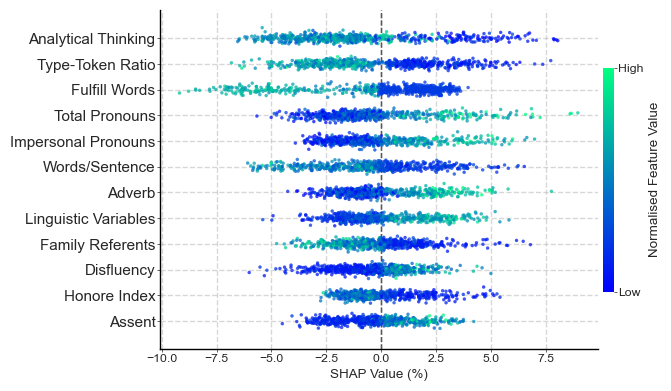

In [24]:
plt.close()
with plotting.paper_theme():

    fig, ax = plt.subplots(1,1,figsize=(7, 4))

    ax = shap.ShapDisplay.from_shap_values(
        shap_values_df,
        n_features_plot=12,
        ax=ax
    )
    plt.tight_layout()
    plt.show()

#### Single prediction(s)

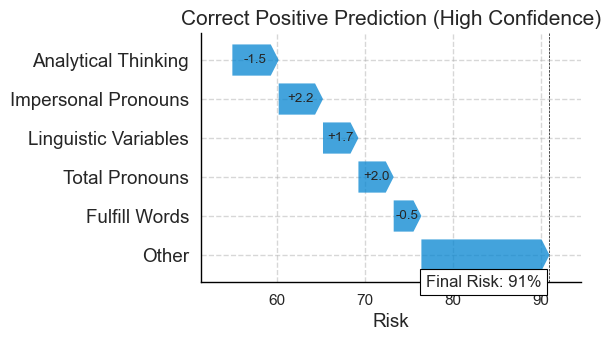

In [25]:
point = 43
plt.close()
with plotting.paper_theme():
    base = shap_base_values[0]*100
    fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
    shap_values_point_df = shap_values_df.query("run == 0").query("Point == @point").rename(
        columns={"SHAP Value": "Risk"}
    )
    ax = shap.risk_feature_plot(shap_values_point_df, base, ax=ax)
    fig.subplots_adjust(left=0.375, right=0.96, top=0.85, bottom=0.2)
    plt.title("Correct Positive Prediction (High Confidence)", fontsize=15)
    plt.tight_layout()
    plt.show()

In [26]:
shap_values_df[shap_values_df.Point == 43].head()

,Point,Feature,SHAP Value,run,Value Norm,Value,y_true,y_proba,pid
43,43,Word Count,-0.568459,0,1.039874,0.995811,1,0.909595,37
114,43,Analytical Thinking,5.264717,0,-1.484745,-1.531396,1,0.909595,37
185,43,Clout,-0.096618,0,-0.870126,-0.912452,1,0.909595,37
256,43,Authentic,-0.495257,0,1.601307,1.691568,1,0.909595,37
327,43,Tone,0.162744,0,-0.764144,-0.791794,1,0.909595,37
